# Chapter 8 - Regression Models for Quantitative and Qualitative Predicators

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.api import het_breuschpagan, anova_lm
from statsmodels.formula.api import ols
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy import stats

DATA_DIR = "../data"
yhat = '\u0177'
square = '\u00b2'

# 8.1 Polynomial Regression Models (p 294)

### Input the Power Cells Data

In [158]:
df = pd.read_pickle(f"{DATA_DIR}/CH08TA01.xz")
df.columns = ['Y', 'X1', 'X2']

### Table 8.1 (p 300)

Data -- Power Cells Example


##### Note

Dataframes provide the ability to do vectorized/matrix math pretty directly. Here we group subtract the means (center) each column and then divide the whole thing by the respective factors used in (8.15).

Included here are $X^2_1$ and $X^2_2$ for use later.

Not included are the label headers

*  Number of Cycles (Y)
*  Charge Rate (X1)
*  Temperature (X2)

In [159]:
dt = (df - df.mean()) / np.array([1, 0.4, 10])
df2 = pd.DataFrame({
    "Y": df.Y,
    "X1": df.X1,
    "X2": df.X2,
    "X1sq": df.X1**2,
    "X2sq": df.X2**2,
    "x1": dt.X1,
    "x2": dt.X2,
    "x1sq": dt.X1**2,
    "x2sq": dt.X2**2,
    "x1x2": dt.X1*dt.X2
})
df2

,Y,X1,X2,X1sq,X2sq,x1,x2,x1sq,x2sq,x1x2
0,150,0.6,10,0.36,100,-1.0,-1.0,1.0,1.0,1.0
1,86,1.0,10,1.00,100,0.0,-1.0,0.0,1.0,-0.0
2,49,1.4,10,1.96,100,1.0,-1.0,1.0,1.0,-1.0
3,288,0.6,20,0.36,400,-1.0,0.0,1.0,0.0,-0.0
4,157,1.0,20,1.00,400,0.0,0.0,0.0,0.0,0.0
5,131,1.0,20,1.00,400,0.0,0.0,0.0,0.0,0.0
6,184,1.0,20,1.00,400,0.0,0.0,0.0,0.0,0.0
7,109,1.4,20,1.96,400,1.0,0.0,1.0,0.0,0.0
8,279,0.6,30,0.36,900,-1.0,1.0,1.0,1.0,-1.0
9,235,1.0,30,1.00,900,0.0,1.0,0.0,1.0,0.0


### Correlations (p 301)

Here we show the whole correlation matrix, but the correlation between $X_1$ and $X^2_1$ are high whereas the standardized values $x_1$ and $x^2_1$ are not correlated at all. 

In [160]:
df2.corr().round(3)

,Y,X1,X2,X1sq,X2sq,x1,x2,x1sq,x2sq,x1x2
Y,1.000,-0.556,0.751,-0.529,0.737,-0.556,0.751,0.165,-0.022,0.093
X1,-0.556,1.000,0.000,0.991,0.000,1.000,0.000,-0.000,-0.000,0.000
X2,0.751,0.000,1.000,0.000,0.986,0.000,1.000,0.000,0.000,-0.000
X1sq,-0.529,0.991,0.000,1.000,0.006,0.991,0.000,0.134,0.036,-0.000
X2sq,0.737,0.000,0.986,0.006,1.000,0.000,0.986,0.044,0.166,-0.000
x1,-0.556,1.000,0.000,0.991,0.000,1.000,0.000,-0.000,0.000,0.000
x2,0.751,0.000,1.000,0.000,0.986,0.000,1.000,0.000,0.000,-0.000
x1sq,0.165,-0.000,0.000,0.134,0.044,-0.000,0.000,1.000,0.267,0.000
x2sq,-0.022,-0.000,0.000,0.036,0.166,0.000,0.000,0.267,1.000,0.000
x1x2,0.093,0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,1.000


### Figure 8.4 (p 302)

Regression Output for Second-Order Polynomial Model -- Power Cells Example

##### Note

While we computed all the columns above, the `statsmodel` formula API adopted from R provides a very easy way to define those transformations using the `I()` function in your formula expression as shown here. Additionally, the interaction term can be stated using `*` or `:`.

*  `y ~ x1:x2` will only specify the interaction term, not the indivudal `x1 + x2`.
*  `y ~ x1*x2` is equivalent to `y ~ x1 + x2 + x1:x2` which is equivalent to `y ~ x1 + x2 + x1*x2`.

In [161]:
model = ols("Y ~ x1 + x2 + I(x1**2) + I(x2**2) + x1:x2", data=df2).fit()
display(model.summary())
display(anova_lm(model))


C:\opt\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     10.57
Date:                Mon, 26 Apr 2021   Prob (F-statistic):             0.0109
Time:                        20:07:06   Log-Likelihood:                -49.523
No. Observations:                  11   AIC:                             111.0
Df Residuals:                       5   BIC:                             113.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    162.8421     16.608      9.805      0.000     120.151     205.533
x1           -55.8333     13.217     -4.224      0.008     -89.808     -21.859
x2            75.5000     13.217      5.712      0.002      41.525     109.475
I(x1 ** 2)    27.3947     20.340      1.347      0.236     -24.891      79.681
I(x2 ** 2)   -10.6053     20.340     -0.521      0.624     -62.891      41.681
x1:x2         11.5000     16.187      0.710      0.509     -30.110      53.110
==============================================================================
Omnibus:                        0.329   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.848   Jarque-Bera (JB):                0.452
Skew:                           0.185   Prob(JB):                        0.798
Kurtosis:                       2.078   Cond. No.                         3.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,df,sum_sq,mean_sq,F,PR(>F)
x1,1.0,18704.166667,18704.166667,17.845994,0.008292
x2,1.0,34201.500000,34201.500000,32.632288,0.002297
I(x1 ** 2),1.0,1645.966667,1645.966667,1.570447,0.265552
I(x2 ** 2),1.0,284.928070,284.928070,0.271855,0.624352
x1:x2,1.0,529.000000,529.000000,0.504729,0.509184
Residual,5.0,5240.438596,1048.087719,NaN,NaN


### Figure 8.5 (p 303)

Diagnostic Residual Plots -- Power Cells Example

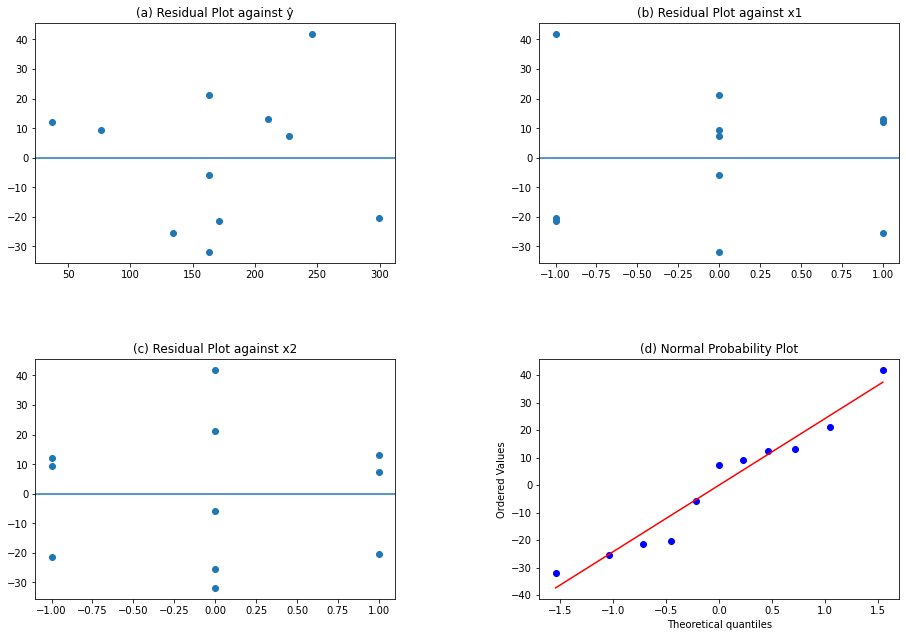

In [162]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

axes[0][0].scatter(model.fittedvalues, model.resid)
axes[0][0].axhline(y=0)
axes[0][1].scatter(model.model.data.frame['x1'], model.resid)
axes[0][1].axhline(y=0)
axes[1][0].scatter(model.model.data.frame['x2'], model.resid)
axes[1][0].axhline(y=0)
qq = stats.probplot(model.resid, plot=axes[1][1])

axes[0][0].set_title(f"(a) Residual Plot against {yhat}")
axes[0][1].set_title("(b) Residual Plot against x1")
axes[1][0].set_title("(c) Residual Plot against x2")
axes[1][1].set_title("(d) Normal Probability Plot")
plt.show()


### Partial F Test (p 303-304)

Using a reduced model without polynomial or interaction terms, we use the anova comparison to get the partial F test statistic. 

##### Note

This can be computed by (7.15) on page 264 as done in Chapter 7. The F statistic is provided, but can be computed accordingly.

$\frac{SS_{diff}}{DF_{diff}} \div \frac{SSR}{DF_{resid}} = \frac{2459.89}{3} \div \frac{5240.44}{5} = 0.7823$

With the `aov` object created here, the equation translates into

`(aov.ss_diff / aov.df_diff) / (aov.ssr / aov.df_resid)`

In [163]:
model_reduced = ols("Y ~ x1 + x2", data=df2).fit()
aov = anova_lm(model_reduced, model).loc[[1]]  # only the comparison row
pd.DataFrame({
    "F*": [float(aov.F)], 
    "Critical Value": [float(stats.f.ppf(0.95, aov.df_diff, aov.df_resid))]
}).round(4)

,F*,Critical Value
0,0.7823,5.4095


### First-Order Model

Since we cannot reject the null hypothesis above that the additional polynomial and interaction terms benefit the model, we replace the studied model with this reduced one and proceed to evaluate accordingly. These summaries and residual plots were not shown in text.

In [164]:
model = model_reduced
display(model.summary())
display(anova_lm(model))

C:\opt\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     27.48
Date:                Mon, 26 Apr 2021   Prob (F-statistic):           0.000261
Time:                        20:07:07   Log-Likelihood:                -51.640
No. Observations:                  11   AIC:                             109.3
Df Residuals:                       8   BIC:                             110.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    172.0000      9.354     18.387      0.000     150.429     193.571
x1           -55.8333     12.666     -4.408      0.002     -85.041     -26.626
x2            75.5000     12.666      5.961      0.000      46.293     104.707
==============================================================================
Omnibus:                        3.206   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.201   Jarque-Bera (JB):                1.211
Skew:                           0.804   Prob(JB):                        0.546
Kurtosis:                       3.244   Cond. No.                         1.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,df,sum_sq,mean_sq,F,PR(>F)
x1,1.0,18704.166667,18704.166667,19.432059,0.002262
x2,1.0,34201.500000,34201.500000,35.532488,0.000338
Residual,8.0,7700.333333,962.541667,NaN,NaN


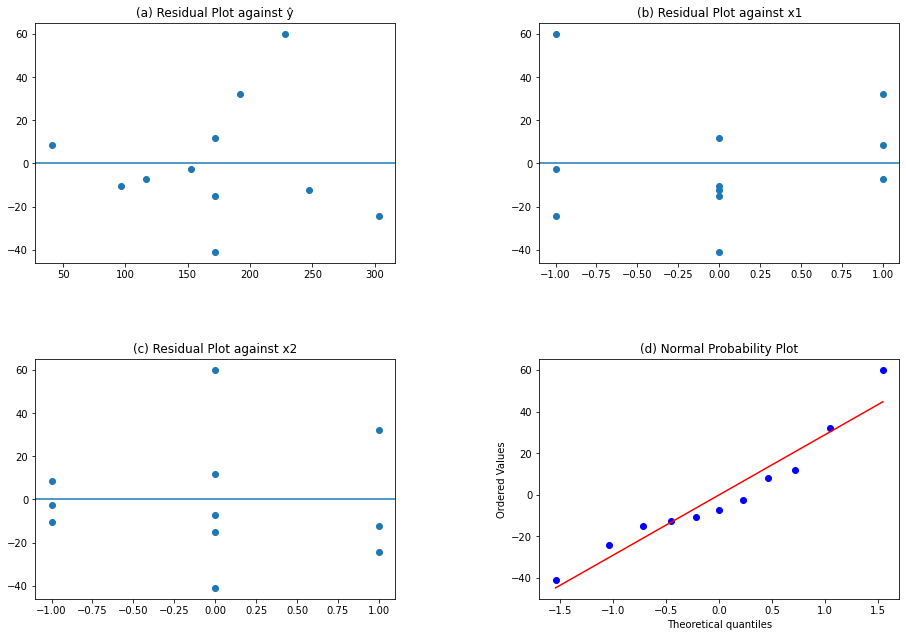

In [165]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

axes[0][0].scatter(model.fittedvalues, model.resid)
axes[0][0].axhline(y=0)
axes[0][1].scatter(model.model.data.frame['x1'], model.resid)
axes[0][1].axhline(y=0)
axes[1][0].scatter(model.model.data.frame['x2'], model.resid)
axes[1][0].axhline(y=0)
qq = stats.probplot(model.resid, plot=axes[1][1])

axes[0][0].set_title(f"(a) Residual Plot against {yhat}")
axes[0][1].set_title("(b) Residual Plot against x1")
axes[1][0].set_title("(c) Residual Plot against x2")
axes[1][1].set_title("(d) Normal Probability Plot")
plt.show()


### Estimation of Regression Coefficients (p 305)

Since the Bonferroni method only requires the standard deviations and a 90 percent family confidence level is given by an alpha of 0.05 in the 2-tail t-test from `conf_int`. We simply fit the original data accordingly and generate the same results below. This may not always work?

In [166]:
ols("Y ~ X1 + X2", data=df2).fit().conf_int()

,0,1
Intercept,64.617930,256.548737
X1,-212.602056,-66.564610
X2,4.629251,10.470749


### Figure 8.6 (p 304)

Plot of Fitted Response Plane -- Power Cells Example

This figure is purosely withheld as being misleading. There is no reason a 3D plot should be used here, and even the visual in the text is next to useless to observe. Save both our times.

# 8.2 Interaction Regression Models (p 306)

### Input the Body Fat Data

In [167]:
df = pd.read_pickle(f"{DATA_DIR}/CH07TA01.xz")
df.columns = ['X1', 'X2', 'X3', 'Y']

### Implementation of Interaction Regression Models (p 311-313)

Below are all the details discussed in this section's example on the Body Fat Data. 

In [168]:
pd.DataFrame({
    "X1": df.X1,
    "X2": df.X2,
    "X3": df.X3,
    "X1X2": df.X1*df.X2,
    "X1X3": df.X1*df.X3,
    "X2X3": df.X2*df.X3
}).corr().round(2)

,X1,X2,X3,X1X2,X1X3,X2X3
X1,1.00,0.92,0.46,0.99,0.90,0.89
X2,0.92,1.00,0.08,0.97,0.67,0.65
X3,0.46,0.08,1.00,0.33,0.79,0.81
X1X2,0.99,0.97,0.33,1.00,0.83,0.82
X1X3,0.90,0.67,0.79,0.83,1.00,1.00
X2X3,0.89,0.65,0.81,0.82,1.00,1.00


In [169]:
dt = df - df.mean()
df2 = pd.DataFrame({
    "Y": df.Y,
    "x1": dt.X1,
    "x2": dt.X2,
    "x3": dt.X3,
    "x12": dt.X1*dt.X2,
    "x13": dt.X1*dt.X3,
    "x23": dt.X2*dt.X3
})
df2

,Y,x1,x2,x3,x12,x13,x23
0,11.9,-5.805,-8.07,1.48,46.84635,-8.5914,-11.9436
1,22.8,-0.605,-1.37,0.58,0.82885,-0.3509,-0.7946
2,18.7,5.395,0.73,9.38,3.93835,50.6051,6.8474
3,20.1,4.495,3.13,3.48,14.06935,15.6426,10.8924
4,12.9,-6.205,-8.97,3.28,55.65885,-20.3524,-29.4216
5,21.7,0.295,2.73,-3.92,0.80535,-1.1564,-10.7016
6,27.1,6.095,7.33,-0.02,44.67635,-0.1219,-0.1466
7,25.4,2.595,0.93,2.98,2.41335,7.7331,2.7714
8,21.3,-3.205,-1.27,-4.42,4.07035,14.1661,5.6134
9,19.3,0.195,2.33,-2.82,0.45435,-0.5499,-6.5706


With centered data, the correlations become much more stable.

In [170]:
df2.corr().round(2)

,Y,x1,x2,x3,x12,x13,x23
Y,1.00,0.84,0.88,0.14,-0.39,-0.25,-0.17
x1,0.84,1.00,0.92,0.46,-0.48,-0.17,-0.22
x2,0.88,0.92,1.00,0.08,-0.43,-0.17,-0.14
x3,0.14,0.46,0.08,1.00,-0.22,-0.03,-0.24
x12,-0.39,-0.48,-0.43,-0.22,1.00,0.23,0.29
x13,-0.25,-0.17,-0.17,-0.03,0.23,1.00,0.89
x23,-0.17,-0.22,-0.14,-0.24,0.29,0.89,1.00


Fitting the full model (8.29)

In [171]:
model = ols("Y ~ x1 + x2 + x3 + x12 + x13 + x23", data=df2).fit()
display(model.summary())
display(anova_lm(model))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     10.07
Date:                Mon, 26 Apr 2021   Prob (F-statistic):           0.000296
Time:                        20:07:09   Log-Likelihood:                -43.160
No. Observations:                  20   AIC:                             100.3
Df Residuals:                      13   BIC:                             107.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.5269      1.074     19.119      0.000      18.207      22.846
x1             3.4378      3.579      0.961      0.354      -4.293      11.169
x2            -2.0947      3.037     -0.690      0.502      -8.655       4.466
x3            -1.6163      1.907     -0.847      0.412      -5.737       2.504
x12            0.0089      0.031      0.288      0.778      -0.058       0.076
x13           -0.0848      0.073     -1.155      0.269      -0.243       0.074
x23            0.0904      0.092      0.983      0.344      -0.108       0.289
==============================================================================
Omnibus:                        0.715   Durbin-Watson:                   2.139
Prob(Omnibus):                  0.699   Jarque-Bera (JB):                0.751
Skew:                          -0.326   Prob(JB):                        0.687
Kurtosis:                       2.310   Cond. No.                         313.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,df,sum_sq,mean_sq,F,PR(>F)
x1,1.0,352.269797,352.269797,52.223827,0.000007
x2,1.0,33.168913,33.168913,4.917275,0.045026
x3,1.0,11.545902,11.545902,1.711674,0.213428
x12,1.0,1.495718,1.495718,0.221739,0.645521
x13,1.0,2.704334,2.704334,0.400916,0.537597
x23,1.0,6.514836,6.514836,0.965821,0.343662
Residual,13.0,87.690000,6.745385,NaN,NaN


The partial F test shows that the reduced model fails to reject the null hypothesis, and cannot conclude that the interaction terms are relevant (have nonzero betas). 

In [172]:
model_reduced = ols("Y ~ x1 + x2 + x3", data=df2).fit()
display(anova_lm(model_reduced, model))
stats.f.ppf(0.95, 3, 13)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,16.0,98.404888,0.0,NaN,NaN,NaN
1,13.0,87.690000,3.0,10.714888,0.529492,0.669868


3.4105336446278476

# 8.3 Qualitative Predictors (p 313)

### Input the Insurance Innovation Data

In [173]:
df = pd.read_pickle(f"{DATA_DIR}/CH08TA02.xz")
df.columns = ['Y', 'X1', 'X2']

### Table 8.2 (p 317)

Data and Indicator Coding -- Insurance Innovation Example

In [174]:
pd.DataFrame({
    "Number of Months": df.Y,
    "Size of Firm": df.X1,
    "Type of Firm": df.X2.apply(lambda x: ("Mutual", "Stock")[x]),
    "Indicator Code": df.X2,
    "X1X2": df.X1*df.X2
})

,Number of Months,Size of Firm,Type of Firm,Indicator Code,X1X2
0,17,151,Mutual,0,0
1,26,92,Mutual,0,0
2,21,175,Mutual,0,0
3,30,31,Mutual,0,0
4,22,104,Mutual,0,0
5,0,277,Mutual,0,0
6,12,210,Mutual,0,0
7,19,120,Mutual,0,0
8,4,290,Mutual,0,0
9,16,238,Mutual,0,0


### Table 8.3 (p 317)

Regression Results for Fit of Regression Model (8.33) -- Insurance Innovation Example

#### Note

The use of `C(X2)` here is to inform the formula that $X_2$ should be treated as a categorical variables. By contrast, in R this is implicit when your data type is encoded as a factor.

Additionally, like in R, you can specify different types of contrasts (treatment, deviation, or helmert). For details, see [statsmodels](https://www.statsmodels.org/stable/examples/notebooks/generated/contrasts.html)

In [175]:
model = ols("Y ~ X1 + C(X2)", data=df).fit()
display(model.summary())
display(anova_lm(model))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     72.50
Date:                Mon, 26 Apr 2021   Prob (F-statistic):           4.77e-09
Time:                        20:07:09   Log-Likelihood:                -50.148
No. Observations:                  20   AIC:                             106.3
Df Residuals:                      17   BIC:                             109.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.8741      1.814     18.675      0.000      30.047      37.701
C(X2)[T.1]     8.0555      1.459      5.521      0.000       4.977      11.134
X1            -0.1017      0.009    -11.443      0.000      -0.121      -0.083
==============================================================================
Omnibus:                        0.143   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.931   Jarque-Bera (JB):                0.120
Skew:                           0.129   Prob(JB):                        0.942
Kurtosis:                       2.722   Cond. No.                         526.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,df,sum_sq,mean_sq,F,PR(>F)
C(X2),1.0,145.800000,145.800000,14.052083,1.599743e-03
X1,1.0,1358.613335,1358.613335,130.942022,2.074687e-09
Residual,17.0,176.386665,10.375686,NaN,NaN


### Figure 8.12 (p 318)

Fitted Regression Functions for Regression Model (8.33) -- Insurance Innovation Example

##### Note

To make this code more automated, I store the 2 chosen color options into a palette variable (`pal`). I create a sequence of it, by applying a lookup to the $X_2$ Series. Then I can reuse this palette variable in the plotting colors, as well. For more flexibility, the row index lookups could also be parameterized.

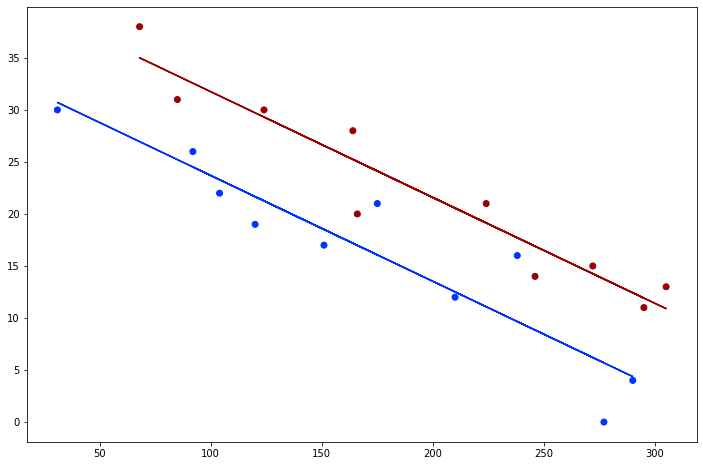

In [176]:
plt.figure(figsize=(12, 8))
pal = ("#0033ff", "#990000")
pal_s = df.X2.apply(lambda x: pal[x])
plt.scatter(df.X1, df.Y, color=pal_s)
plt.plot(df.X1[df.X2==0], model.fittedvalues[df.X2==0], pal[0])
plt.plot(df.X1[df.X2==1], model.fittedvalues[df.X2==1], pal[1])
plt.show()

# 8.4 Some Considerations in Using Indicator Variables (p 321)

# 8.5 Modeling Interactions between Quantitative and Qualitative Predictors (p 324)

### Table 8.4 (p 327)

Regression Results for Fit of Regression (8.49) with Interaction Term -- Insurance Innovation Example

##### Note

The illustrations in Figure 8.14 and 8.15 exaggerate the interaction term effect in this instance. As shown below, it has negligible impact on the slope, which is why the `model2` fitted lines look the same. 

In [177]:
model2 = ols("Y ~ X1 + C(X2) + X1:C(X2)", data=df).fit()
display(model2.summary())
display(anova_lm(model2))
display(anova_lm(model, model2))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     45.49
Date:                Mon, 26 Apr 2021   Prob (F-statistic):           4.67e-08
Time:                        20:07:09   Log-Likelihood:                -50.148
No. Observations:                  20   AIC:                             108.3
Df Residuals:                      16   BIC:                             112.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        33.8384      2.441     13.864      0.000      28.664      39.012
C(X2)[T.1]        8.1313      3.654      2.225      0.041       0.385      15.877
X1               -0.1015      0.013     -7.779      0.000      -0.129      -0.074
X1:C(X2)[T.1]    -0.0004      0.018     -0.023      0.982      -0.039       0.038
==============================================================================
Omnibus:                        0.133   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.936   Jarque-Bera (JB):                0.112
Skew:                           0.120   Prob(JB):                        0.945
Kurtosis:                       2.723   Cond. No.                     1.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

,df,sum_sq,mean_sq,F,PR(>F)
C(X2),1.0,145.800000,145.800000,13.225918,2.220014e-03
X1,1.0,1358.613335,1358.613335,123.243539,6.299115e-09
X1:C(X2),1.0,0.005708,0.005708,0.000518,9.821265e-01
Residual,16.0,176.380957,11.023810,NaN,NaN


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,17.0,176.386665,0.0,NaN,NaN,NaN
1,16.0,176.380957,1.0,0.005708,0.000518,0.982126


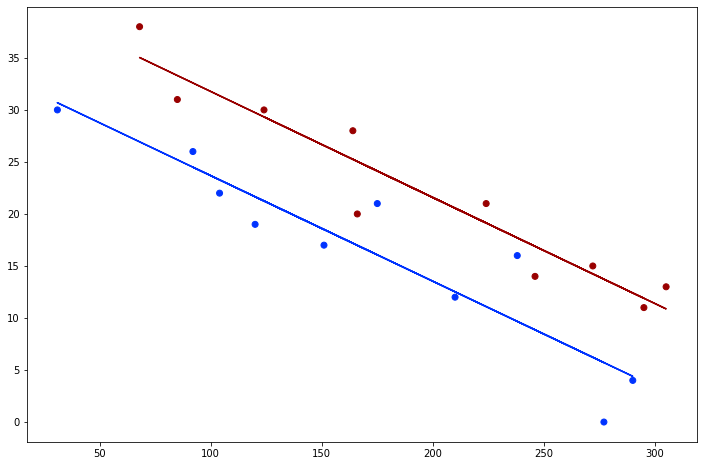

In [178]:
plt.figure(figsize=(12, 8))
pal = ("#0033ff", "#990000")
pal_s = df.X2.apply(lambda x: pal[x])
plt.scatter(df.X1, df.Y, color=pal_s)
plt.plot(df.X1[df.X2==0], model2.fittedvalues[df.X2==0], pal[0])
plt.plot(df.X1[df.X2==1], model2.fittedvalues[df.X2==1], pal[1])
plt.show()

# 8.6 More Complex Models (p 327)

# 8.7 Comparison of Two or More Regression Functions (p 329)

### Input the Soap Production Lines Data

In [179]:
df = pd.read_pickle(f"{DATA_DIR}/CH08TA05.xz")
df.columns = ['Y', 'X1', 'X2']

### Table 8.5 (p 330)

Data -- Soap Production Lines Example

In [180]:
pd.DataFrame({
    "Amount of Scrap": df.Y,
    "Line Speed": df.X1,
    "Line Indicator": df.X2
})

,Amount of Scrap,Line Speed,Line Indicator
0,218,100,1
1,248,125,1
2,360,220,1
3,351,205,1
4,470,300,1
5,394,255,1
6,332,225,1
7,321,175,1
8,410,270,1
9,260,170,1


### Table 8.6 (p 332)

Regression Results for Fit of Regression Model (8.55) -- Soap Production Lines Example

##### Note

Included here are the partial F tests (8.56) and (8.57) on page 333, supporting the inclusion of $X_2$ but not that the slopes are different. 

In [181]:
model = ols("Y ~ X1 + C(X2) + X1:C(X2)", data=df).fit()
model_reduced1 = ols("Y ~ X1", data=df).fit()
model_reduced2 = ols("Y ~ X1 + C(X2)", data=df).fit()
display(model.summary())
display(anova_lm(model))
display(anova_lm(model_reduced1, model))
display(anova_lm(model_reduced2, model))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     130.9
Date:                Mon, 26 Apr 2021   Prob (F-statistic):           1.34e-14
Time:                        20:07:10   Log-Likelihood:                -118.03
No. Observations:                  27   AIC:                             244.1
Df Residuals:                      23   BIC:                             249.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.5745     20.870      0.363      0.720     -35.598      50.747
C(X2)[T.1]       90.3909     28.346      3.189      0.004      31.753     149.028
X1                1.3220      0.093     14.273      0.000       1.130       1.514
X1:C(X2)[T.1]    -0.1767      0.129     -1.371      0.184      -0.443       0.090
==============================================================================
Omnibus:                        0.440   Durbin-Watson:                   1.799
Prob(Omnibus):                  0.803   Jarque-Bera (JB):                0.574
Skew:                          -0.143   Prob(JB):                        0.751
Kurtosis:                       2.345   Cond. No.                     2.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

,df,sum_sq,mean_sq,F,PR(>F)
C(X2),1.0,10998.090741,10998.090741,25.540654,4.082514e-05
X1,1.0,157356.970499,157356.970499,365.427052,1.292217e-15
X1:C(X2),1.0,809.622579,809.622579,1.880171,1.835463e-01
Residual,23.0,9904.056923,430.611171,NaN,NaN


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,25.0,29407.758208,0.0,NaN,NaN,NaN
1,23.0,9904.056923,2.0,19503.701285,22.646534,0.000004


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,24.0,10713.679501,0.0,NaN,NaN,NaN
1,23.0,9904.056923,1.0,809.622579,1.880171,0.183546


### Figure 8.16 (p 331)

Symbolic Scatter plot -- Soap Production Lines Example

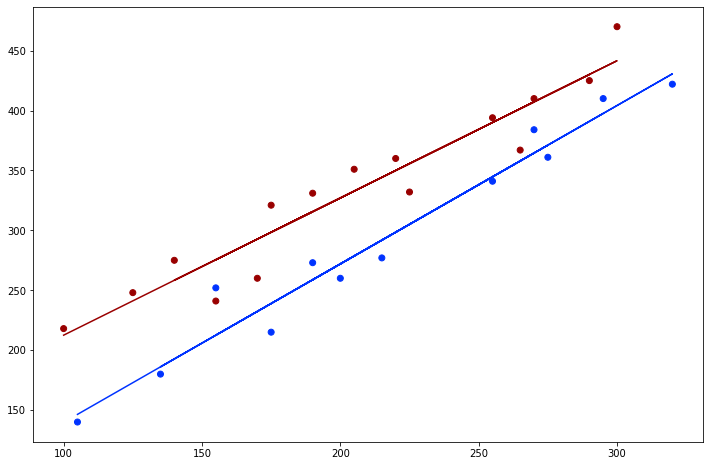

In [182]:
plt.figure(figsize=(12, 8))
pal = ("#0033ff", "#990000")
pal_s = df.X2.apply(lambda x: pal[x])
plt.scatter(df.X1, df.Y, color=pal_s)
plt.plot(df.X1[df.X2==0], model.fittedvalues[df.X2==0], pal[0])
plt.plot(df.X1[df.X2==1], model.fittedvalues[df.X2==1], pal[1])
plt.show()

### Figure 8.17 (p 332)

Residual Plots against $\hat{Y}$ -- Soap Production Lines Example

##### Note

The author mentions under the **Diagnostics** section (p 331) that the coefficient of correlation between the ordered residuals and their expected values under normality is 0.990. This can be obtained from the [stats.probplot](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html). In particular `qq[1][2]` below.

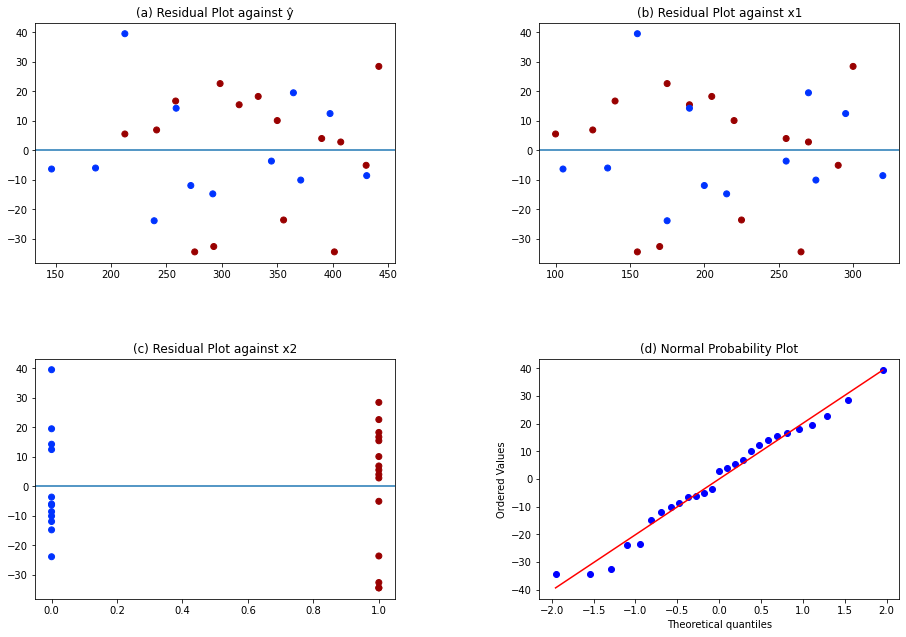

In [183]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
pal = ("#0033ff", "#990000")
pal_s = df.X2.apply(lambda x: pal[x])

axes[0][0].scatter(model.fittedvalues, model.resid, color=pal_s)
axes[0][0].axhline(y=0)
axes[0][1].scatter(model.model.data.frame['X1'], model.resid, color=pal_s)
axes[0][1].axhline(y=0)
axes[1][0].scatter(model.model.data.frame['X2'], model.resid, color=pal_s)
axes[1][0].axhline(y=0)
qq = stats.probplot(model.resid, plot=axes[1][1])

axes[0][0].set_title(f"(a) Residual Plot against {yhat}")
axes[0][1].set_title("(b) Residual Plot against x1")
axes[1][0].set_title("(c) Residual Plot against x2")
axes[1][1].set_title("(d) Normal Probability Plot")
plt.show()

### Brown-Forsythe Test (p 331-333)

Without computing all the $\bar{d}_i$ or $\Sigma{(d_{ij}-\bar{d}_j)}$, we simply use the [levene](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html) test used in Chapter 3. While the test statistic does not match that in the book, the p-value does. 

In [184]:
stats.levene(
    ols("Y ~ X1", df[df.X2==0]).fit().resid,
    ols("Y ~ X1", df[df.X2==1]).fit().resid,
    center="median")

LeveneResult(statistic=0.40472431993122737, pvalue=0.5304412598357828)

# References

[Linear Model Regression Results (statsmodels)](https://www.statsmodels.org/v0.12.1/generated/statsmodels.regression.linear_model.RegressionResults.html)

[Contrast Coding (statsmodels)](https://www.statsmodels.org/stable/examples/notebooks/generated/contrasts.html)

[QQ Plot or Normal Probability Plot (scipy)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html)

[Levene or Brown-Forsythe Test (scipy)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html)

[Z-Score Transformation (scipy)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html)

[Box Cox Transformations (scipy)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html)

### Graphics

[Pandas Plotting](https://pandas.pydata.org/pandas-docs/stable/reference/plotting.html)

[Matplotlib Color Maps](https://matplotlib.org/stable/tutorials/colors/colormaps.html)